In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram

%matplotlib inline

def document_similarity(documents, title):
    # simple lowercase tokenize
    tokens = nltk.word_tokenize(bookStr.lower())

    allWords = set([word.lower() for word in nltk.word_tokenize(" ".join(documents)) if any([c for c in word if c.isalpha()])])
    allRawFreqs = [nltk.FreqDist(nltk.word_tokenize(document.lower())) for document in documents]
    pd.DataFrame(allRawFreqs).fillna(0)
    
    simpledtm = TfidfVectorizer().fit_transform(documents) # takes a list of strings (and tokenizes them for us)
    pd.DataFrame(simpledtm.toarray())
    
    documentTermMatrix = TfidfVectorizer().fit_transform(documents)
    distances = 1 - cosine_similarity(documentTermMatrix)

    # reduce our n-dimensional distances matrix to a two dimensional matrix (for x and y coordinates)
    mds = MDS(dissimilarity="precomputed", random_state=1)
    positions = mds.fit_transform(distances)

    return distances, positions

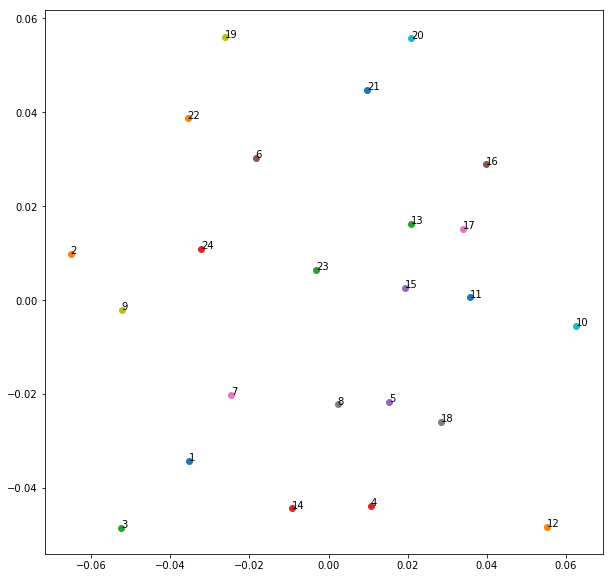

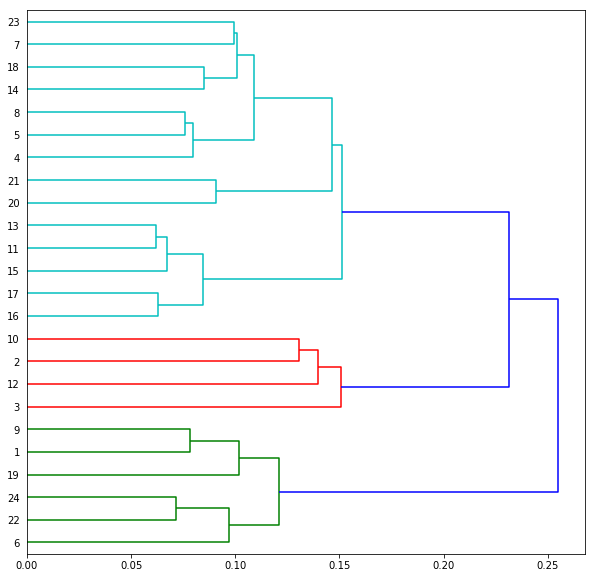

In [2]:
# read The books plain text into string
books = []
names = [str(i) for i in range(1, 25)]
for i in range(1, 25):
    with open("data/"+ str(i), "r") as f:
        bookStr = f.read()
        books.append(bookStr)
(distances, positions) = document_similarity(books, "The Iliad's Books")

xvalues = positions[:, 0] # the left colunn (x axis) for all rows
yvalues = positions[: ,1] # the right column (y axis) for all rows

plt.figure(figsize=(10,10)) # make the graph easier to see
for x, y, name in zip(xvalues, yvalues, names):
    plt.scatter(x, y)
    plt.text(x, y, name.replace(".txt", ""))
plt.show()

plt.figure(figsize=(10,10)) # make the graph easier to see
linkage_matrix = ward(distances)
dendrogram(linkage_matrix, labels=names, orientation="right");
plt.show()  # fixes margins
